In [2]:
import pandas as pd
from plotting import plot_boxplots_and_outliers, plot_numeric_distributions, plot_value_counts, plot_correlation_matrix, plot_by_year_buckets

In [3]:
# load experimental/albums.json into dataframe
df = pd.read_json('../experimental/artists.json')

In [4]:
df.head()

,id,uri,name,genres,popularity,followers,albums,top_tracks
0,6styCzc1Ej4NxISL0LiigM,spotify:artist:6styCzc1Ej4NxISL0LiigM,The Smile,[uk post-punk revival],53,433500,"[6PdPOv5ybKZ9ZuGMk5iGZd, 6x4C6uMJqQnnp4V39p2Ce...","[3tP2P4KybC9wYVI8Pe41GT, 6o2yIQVzajJjRrgICzcfA..."
1,5ZMwoAjeDtLJ0XRwRTgaK8,spotify:artist:5ZMwoAjeDtLJ0XRwRTgaK8,Quantic,"[downtempo, electronica, latin alternative, nu...",58,345348,"[0OQDgPsunDOfPiRAuS87ng, 2ecxzRChLnsvsmrF3DXp4...","[24ylIO48nRsdaONlM8l2HF, 0zcjgr2Vrit8B1jJC48bL..."
2,6zVFRTB0Y1whWyH7ZNmywf,spotify:artist:6zVFRTB0Y1whWyH7ZNmywf,Tash Sultana,[australian reggae fusion],58,1666608,"[7d2SqyTg0hFU0r3H14CxL8, 5cB5c50EJjxKTEnA599RC...","[1KTObLMW9mwk2iPjP3daHb, 3KJBV5kgbjswZD8JIqtLH..."
3,20wkVLutqVOYrc0kxFs7rA,spotify:artist:20wkVLutqVOYrc0kxFs7rA,Daniel Caesar,[canadian contemporary r&b],77,5736960,"[0qGQrHicD7qXuz5VMlDuCe, 2z9lM6LDS58F70IGyQ1XM...","[1RMJOxR6GRPsBHL8qeC2ux, 7zFXmv6vqI4qOt4yGf3jY..."
4,3oKRxpszQKUjjaHz388fVA,spotify:artist:3oKRxpszQKUjjaHz388fVA,Parcels,"[aussietronica, indie soul]",62,807349,"[4FNiZmcoq8ts6zIDDUvTp9, 2FJj7NVoRCAwjFus0O1BX...","[66tkDkPsznE5zIHNt4QkXB, 0hhXziDUO0wNYPsstDQWN..."


In [5]:
df.shape

(336, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          336 non-null    object
 1   uri         336 non-null    object
 2   name        336 non-null    object
 3   genres      336 non-null    object
 4   popularity  336 non-null    int64 
 5   followers   336 non-null    int64 
 6   albums      336 non-null    object
 7   top_tracks  336 non-null    object
dtypes: int64(2), object(6)
memory usage: 21.1+ KB


In [7]:
df.describe(include='all')

,id,uri,name,genres,popularity,followers,albums,top_tracks
count,336,336,336,336,336.000000,3.360000e+02,336,336
unique,336,336,336,267,NaN,NaN,335,334
top,6styCzc1Ej4NxISL0LiigM,spotify:artist:6styCzc1Ej4NxISL0LiigM,The Smile,[],NaN,NaN,[],[]
freq,1,1,1,47,NaN,NaN,2,3
mean,NaN,NaN,NaN,NaN,50.342262,2.310828e+06,NaN,NaN
std,NaN,NaN,NaN,NaN,17.153533,9.177251e+06,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,3.100000e+01,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,2.980725e+04,NaN,NaN
50%,NaN,NaN,NaN,NaN,51.000000,1.716465e+05,NaN,NaN
75%,NaN,NaN,NaN,NaN,62.000000,9.035955e+05,NaN,NaN


In [8]:
# check NAs
df.isna().sum()

id            0
uri           0
name          0
genres        0
popularity    0
followers     0
albums        0
top_tracks    0
dtype: int64

The following columns contain a lot of unique values: id, uri, name.

In [9]:
# check the number of unique values for id, uri, name, label
print(f"In total, there are {df.shape[0]} artists in the DataFrame.")
print(f"There are {df['id'].nunique()} unique values for 'id'.")
print(f"There are {df['uri'].nunique()} unique values for 'uri'.")
print(f"There are {df['name'].nunique()} unique values for 'name'.")

In total, there are 336 artists in the DataFrame.
There are 336 unique values for 'id'.
There are 336 unique values for 'uri'.
There are 336 unique values for 'name'.


## Numeric columns

In [10]:
df.describe()

,popularity,followers
count,336.000000,3.360000e+02
mean,50.342262,2.310828e+06
std,17.153533,9.177251e+06
min,0.000000,3.100000e+01
25%,40.000000,2.980725e+04
50%,51.000000,1.716465e+05
75%,62.000000,9.035955e+05
max,93.000000,8.729212e+07


In [11]:
df.sort_values(by='popularity', ascending=False).head(10)

,id,uri,name,genres,popularity,followers,albums,top_tracks
166,3TVXtAsR1Inumwj472S9r4,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,"[canadian hip hop, canadian pop, hip hop, pop ...",93,87292118,"[4Q7cRXio6mF2ImVUCcezPO, 4czdORdCWP9umpbhFXK2f...","[3eh51r6rFWAlGQRlHx9QnQ, 1zi7xx7UVEFkmKfv06H8x..."
72,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",91,82902188,"[35dut3ICqF3NEDkjxfzJJ1, 1OARrXe5sB0gyy3MhQ8h9...","[7CyPwkp0oE8Ro9Dd5CUDjW, 7MXVkk9YMctZqd1Srtv4M..."
44,0Y5tJX1MQlPlqiwlOH1tJY,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,"[hip hop, rap, slap house]",90,29073750,"[18NOKLkZETa4sWwLMIm0UZ, 1Sf8GsXG32t0jNrX11xqW...","[42VsgItocQwOQC3XWZ8JNA, 28drn6tQo95MRvO0jQEo5..."
168,5K4W6rqBFWDnAN6FQUkS6x,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"[chicago rap, hip hop, rap]",89,25162599,"[30zwjSQEodaUXCn11nmiVF, 2Wiyo7LzdeBCsVZiRA6vV...","[3w0w2T288dec0mgeZZqoNN, 4EWCNWgDS8707fNSZ1oaA..."
156,2YZyLoL8N0Wb9xBt1NhZWg,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",88,28252945,"[79ONNoS4M9tfIA1mYLBYVX, 3pLdWdkj83EYfDN6H2N8M...","[2tudvzsrR56uom6smgOcSf, 77DRzu7ERs0TX3roZcre7..."
182,00FQb4jTyendYWaN8pK0wa,spotify:artist:00FQb4jTyendYWaN8pK0wa,Lana Del Rey,"[art pop, pop]",87,34737723,"[5HOHne1wzItQlIYmLXLYfZ, 2wwCc6fcyhp1tfY3J6Jav...","[3BJe4B8zGnqEdQPMvfVjuS, 6GGtHZgBycCgGBUhZo81x..."
142,246dkjvS1zLTtiykXe5h60,spotify:artist:246dkjvS1zLTtiykXe5h60,Post Malone,"[dfw rap, melodic rap, pop, rap]",87,43729075,"[1F9LY06gadScF4g3g3BrDC, 6r1lh7fHMB499vGKtIyJL...","[2OzhQlSqBEmt7hmkYxfT6m, 0RiRZpuVRbi7oqRdSMwhQ..."
20,7dGJo4pcD2V6oG8kP0tJRR,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,Eminem,"[detroit hip hop, hip hop, rap]",86,83673551,"[5EUgcfO5OWxnniHR3QYFcK, 3aTuW4BtsyyyyQa9LKqj8...","[7lQ8MOhq6IN2w8EYcFNSUk, 561jH07mF1jHuk7KlaeF0..."
235,2h93pZq0e7k5yf4dywlkpM,spotify:artist:2h93pZq0e7k5yf4dywlkpM,Frank Ocean,"[lgbtq+ hip hop, neo soul]",82,13689515,"[3mH6qwIy9crq0I9YQbOuDf, 392p3shh2jkxUxY2VHvlH...","[3xKsf9qdS1CyvXSMEid6g8, 7DfFc7a6Rwfi3YQMRbDMa..."
326,7Ln80lUS6He07XvHI8qqHH,spotify:artist:7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,"[garage rock, modern rock, permanent wave, roc...",82,24482384,"[2GROf0WKoP5Er2M9RXVNNs, 7Heaa0B4KOxdWhSICTR2w...","[5XeFesFbtLpXzIVDNQP22n, 0BxE4FqsDD1Ot4YuBXwAP..."


In [12]:
# 0 popularity
df[df['popularity'] == 0]

,id,uri,name,genres,popularity,followers,albums,top_tracks
95,0pRuXv2OXnUEOe9HHMNJye,spotify:artist:0pRuXv2OXnUEOe9HHMNJye,Bambino Prodigio,[],0,666,"[01TTVqj6CODBvoz35QNjDj, 6wSoj4QIaJzUTgqCGxN1e...","[6X9ppEffiYGs672R7uReVg, 096MrmHeki1JzX1aMostz..."
134,0LyfQWJT6nXafLPZqxe9Of,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,[],0,2411603,[],"[4Y2iP7H0ouyXORPBUGRQKx, 0E5yP9VjrfG7wRyjWN9tr..."
157,6jdLQbJfJuo1uZf5TiHcpL,spotify:artist:6jdLQbJfJuo1uZf5TiHcpL,elin kastlander,[],0,31,[],[]
286,7r1VJ53RGn5jqR98Sgpe9l,spotify:artist:7r1VJ53RGn5jqR98Sgpe9l,Elli Eli,[],0,4116,[0dLuWZHyjOXhYRzaGWw5Dv],"[7xOpQZSxd04DgRcFf99xTL, 0STgyT9RdXB4q3qK4SJ1vX]"


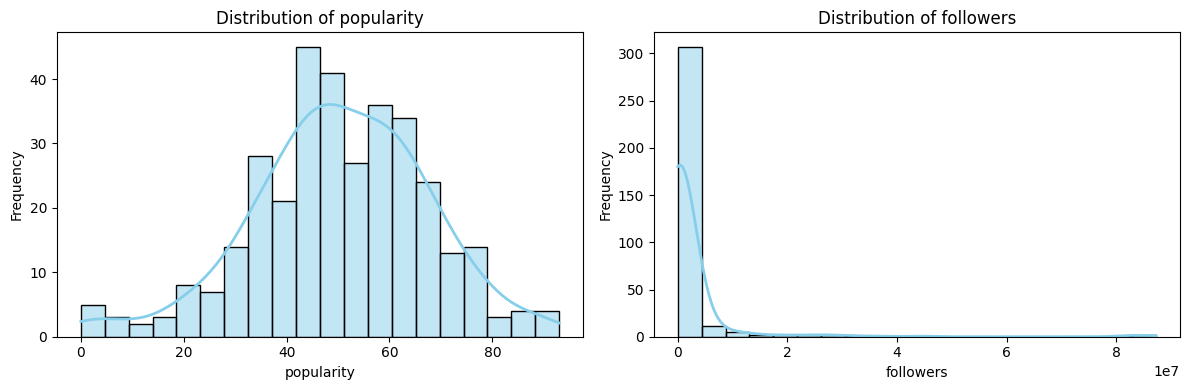

In [13]:
plot_numeric_distributions(df)

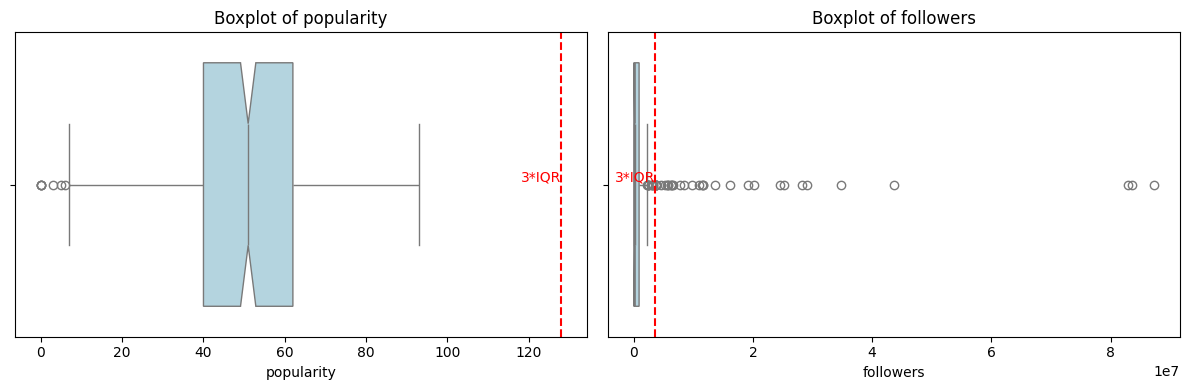

In [14]:
plot_boxplots_and_outliers(df)

In [15]:
# get popularity less than 10
df[df['popularity'] < 10]

,id,uri,name,genres,popularity,followers,albums,top_tracks
30,6Y43bUHBIIXbMw8TMkTIAf,spotify:artist:6Y43bUHBIIXbMw8TMkTIAf,Eugene Naumov,[],3,82,"[4YEyC7kUIfHSwtR3WJJW8h, 3YTqLnABdkiAU8DmLLvQll]","[6F8htsok8BD2DigTgifNt2, 46DrMmT3qc45ZDIjOpxKQK]"
31,01eG7QvHOYeU2DM2951Opm,spotify:artist:01eG7QvHOYeU2DM2951Opm,29BabyJ,[corecore],7,930,"[0NctDGPa54lUnjuo7lwiMz, 12gKxlprASHmfb3xzAa6G...","[3GBatvWCwu3BbCkOnW1aKH, 1zrHEWtn7fFHBbynq4ECR..."
82,4dkFGTxRsTtgHDVvvR04Ob,spotify:artist:4dkFGTxRsTtgHDVvvR04Ob,Unravel,[australian hardcore],5,2665,"[64bKN0IE308F3vLdlRjOlC, 0LGbeVJEsTgewFDDXdAWv...","[3vFCT1nG1iWjpScvhgpfyI, 2dRg9x3qJW3GlHdccfwCb..."
95,0pRuXv2OXnUEOe9HHMNJye,spotify:artist:0pRuXv2OXnUEOe9HHMNJye,Bambino Prodigio,[],0,666,"[01TTVqj6CODBvoz35QNjDj, 6wSoj4QIaJzUTgqCGxN1e...","[6X9ppEffiYGs672R7uReVg, 096MrmHeki1JzX1aMostz..."
134,0LyfQWJT6nXafLPZqxe9Of,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,[],0,2411603,[],"[4Y2iP7H0ouyXORPBUGRQKx, 0E5yP9VjrfG7wRyjWN9tr..."
157,6jdLQbJfJuo1uZf5TiHcpL,spotify:artist:6jdLQbJfJuo1uZf5TiHcpL,elin kastlander,[],0,31,[],[]
286,7r1VJ53RGn5jqR98Sgpe9l,spotify:artist:7r1VJ53RGn5jqR98Sgpe9l,Elli Eli,[],0,4116,[0dLuWZHyjOXhYRzaGWw5Dv],"[7xOpQZSxd04DgRcFf99xTL, 0STgyT9RdXB4q3qK4SJ1vX]"
302,3TWdfQFoT40tFweaNKRzni,spotify:artist:3TWdfQFoT40tFweaNKRzni,Gangplans,[],6,1338,"[1oxbP5QLz3BNdBBAjZuNCS, 3N6dTyddi92DANpstPsVG...","[1GvrrKeINHgvgoX2KF9lHo, 13ipoZZ1Y0Tdert3jfjvg..."


In [16]:
# get extreme outliers of followers column
Q1 = df['followers'].quantile(0.25)
Q3 = df['followers'].quantile(0.75)
IQR = Q3 - Q1
extreme_outliers = df[(df['followers'] < (Q1 - 3 * IQR)) | (df['followers'] > (Q3 + 3 * IQR))]
extreme_outliers.sort_values(by='followers', ascending=False)

,id,uri,name,genres,popularity,followers,albums,top_tracks
166,3TVXtAsR1Inumwj472S9r4,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,"[canadian hip hop, canadian pop, hip hop, pop ...",93,87292118,"[4Q7cRXio6mF2ImVUCcezPO, 4czdORdCWP9umpbhFXK2f...","[3eh51r6rFWAlGQRlHx9QnQ, 1zi7xx7UVEFkmKfv06H8x..."
20,7dGJo4pcD2V6oG8kP0tJRR,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,Eminem,"[detroit hip hop, hip hop, rap]",86,83673551,"[5EUgcfO5OWxnniHR3QYFcK, 3aTuW4BtsyyyyQa9LKqj8...","[7lQ8MOhq6IN2w8EYcFNSUk, 561jH07mF1jHuk7KlaeF0..."
72,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",91,82902188,"[35dut3ICqF3NEDkjxfzJJ1, 1OARrXe5sB0gyy3MhQ8h9...","[7CyPwkp0oE8Ro9Dd5CUDjW, 7MXVkk9YMctZqd1Srtv4M..."
142,246dkjvS1zLTtiykXe5h60,spotify:artist:246dkjvS1zLTtiykXe5h60,Post Malone,"[dfw rap, melodic rap, pop, rap]",87,43729075,"[1F9LY06gadScF4g3g3BrDC, 6r1lh7fHMB499vGKtIyJL...","[2OzhQlSqBEmt7hmkYxfT6m, 0RiRZpuVRbi7oqRdSMwhQ..."
182,00FQb4jTyendYWaN8pK0wa,spotify:artist:00FQb4jTyendYWaN8pK0wa,Lana Del Rey,"[art pop, pop]",87,34737723,"[5HOHne1wzItQlIYmLXLYfZ, 2wwCc6fcyhp1tfY3J6Jav...","[3BJe4B8zGnqEdQPMvfVjuS, 6GGtHZgBycCgGBUhZo81x..."
44,0Y5tJX1MQlPlqiwlOH1tJY,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,"[hip hop, rap, slap house]",90,29073750,"[18NOKLkZETa4sWwLMIm0UZ, 1Sf8GsXG32t0jNrX11xqW...","[42VsgItocQwOQC3XWZ8JNA, 28drn6tQo95MRvO0jQEo5..."
156,2YZyLoL8N0Wb9xBt1NhZWg,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",88,28252945,"[79ONNoS4M9tfIA1mYLBYVX, 3pLdWdkj83EYfDN6H2N8M...","[2tudvzsrR56uom6smgOcSf, 77DRzu7ERs0TX3roZcre7..."
168,5K4W6rqBFWDnAN6FQUkS6x,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"[chicago rap, hip hop, rap]",89,25162599,"[30zwjSQEodaUXCn11nmiVF, 2Wiyo7LzdeBCsVZiRA6vV...","[3w0w2T288dec0mgeZZqoNN, 4EWCNWgDS8707fNSZ1oaA..."
326,7Ln80lUS6He07XvHI8qqHH,spotify:artist:7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,"[garage rock, modern rock, permanent wave, roc...",82,24482384,"[2GROf0WKoP5Er2M9RXVNNs, 7Heaa0B4KOxdWhSICTR2w...","[5XeFesFbtLpXzIVDNQP22n, 0BxE4FqsDD1Ot4YuBXwAP..."
189,0k17h0D3J5VfsdmQ1iZtE9,spotify:artist:0k17h0D3J5VfsdmQ1iZtE9,Pink Floyd,"[album rock, art rock, classic rock, progressi...",75,20173503,"[3v9Emq8Cv300wNpF3AVFWw, 3hlRTl7wuUk2O3PI1RTvs...","[7rPzEczIS574IgPaiPieS3, 1HzDhHApjdjXPLHF6GGYh..."


The nature of follower count is that it is a very skewed distribution. The vast majority of artists have very few followers, while a few have a lot. This is why the mean is so much higher than the median, and there are a lot of extreme outliers with the 3*IQR rule.

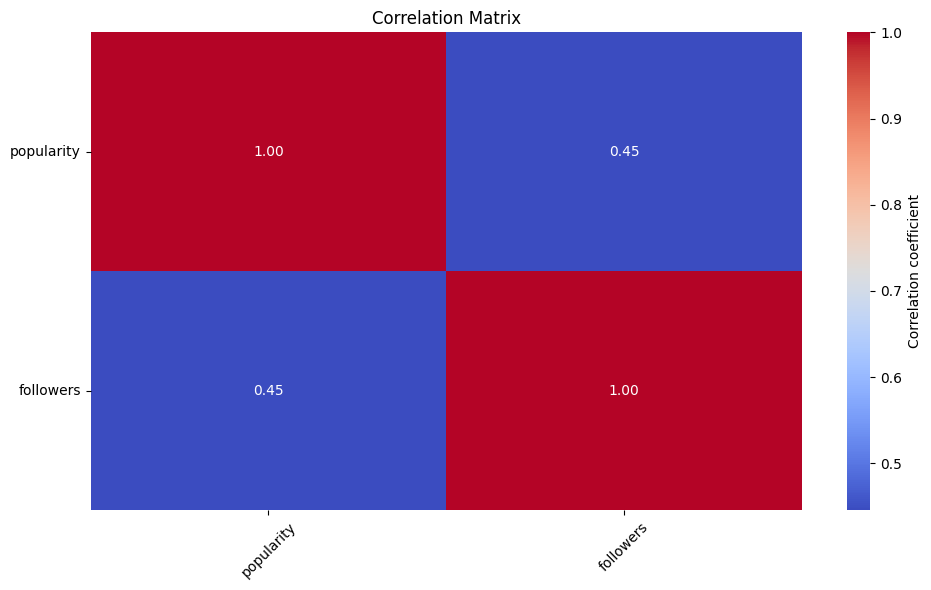

In [17]:
plot_correlation_matrix(df)

## Array-like columns

In [18]:
array_like_columns = ['genres', 'albums', 'top_tracks']
df_copy = df.copy()

for col in array_like_columns:
    df_copy[f"{col}_length"] = df_copy[col].apply(lambda x: len(x))

In [19]:
df_copy.head()

,id,uri,name,genres,popularity,followers,albums,top_tracks,genres_length,albums_length,top_tracks_length
0,6styCzc1Ej4NxISL0LiigM,spotify:artist:6styCzc1Ej4NxISL0LiigM,The Smile,[uk post-punk revival],53,433500,"[6PdPOv5ybKZ9ZuGMk5iGZd, 6x4C6uMJqQnnp4V39p2Ce...","[3tP2P4KybC9wYVI8Pe41GT, 6o2yIQVzajJjRrgICzcfA...",1,7,10
1,5ZMwoAjeDtLJ0XRwRTgaK8,spotify:artist:5ZMwoAjeDtLJ0XRwRTgaK8,Quantic,"[downtempo, electronica, latin alternative, nu...",58,345348,"[0OQDgPsunDOfPiRAuS87ng, 2ecxzRChLnsvsmrF3DXp4...","[24ylIO48nRsdaONlM8l2HF, 0zcjgr2Vrit8B1jJC48bL...",6,322,10
2,6zVFRTB0Y1whWyH7ZNmywf,spotify:artist:6zVFRTB0Y1whWyH7ZNmywf,Tash Sultana,[australian reggae fusion],58,1666608,"[7d2SqyTg0hFU0r3H14CxL8, 5cB5c50EJjxKTEnA599RC...","[1KTObLMW9mwk2iPjP3daHb, 3KJBV5kgbjswZD8JIqtLH...",1,36,10
3,20wkVLutqVOYrc0kxFs7rA,spotify:artist:20wkVLutqVOYrc0kxFs7rA,Daniel Caesar,[canadian contemporary r&b],77,5736960,"[0qGQrHicD7qXuz5VMlDuCe, 2z9lM6LDS58F70IGyQ1XM...","[1RMJOxR6GRPsBHL8qeC2ux, 7zFXmv6vqI4qOt4yGf3jY...",1,90,10
4,3oKRxpszQKUjjaHz388fVA,spotify:artist:3oKRxpszQKUjjaHz388fVA,Parcels,"[aussietronica, indie soul]",62,807349,"[4FNiZmcoq8ts6zIDDUvTp9, 2FJj7NVoRCAwjFus0O1BX...","[66tkDkPsznE5zIHNt4QkXB, 0hhXziDUO0wNYPsstDQWN...",2,50,10


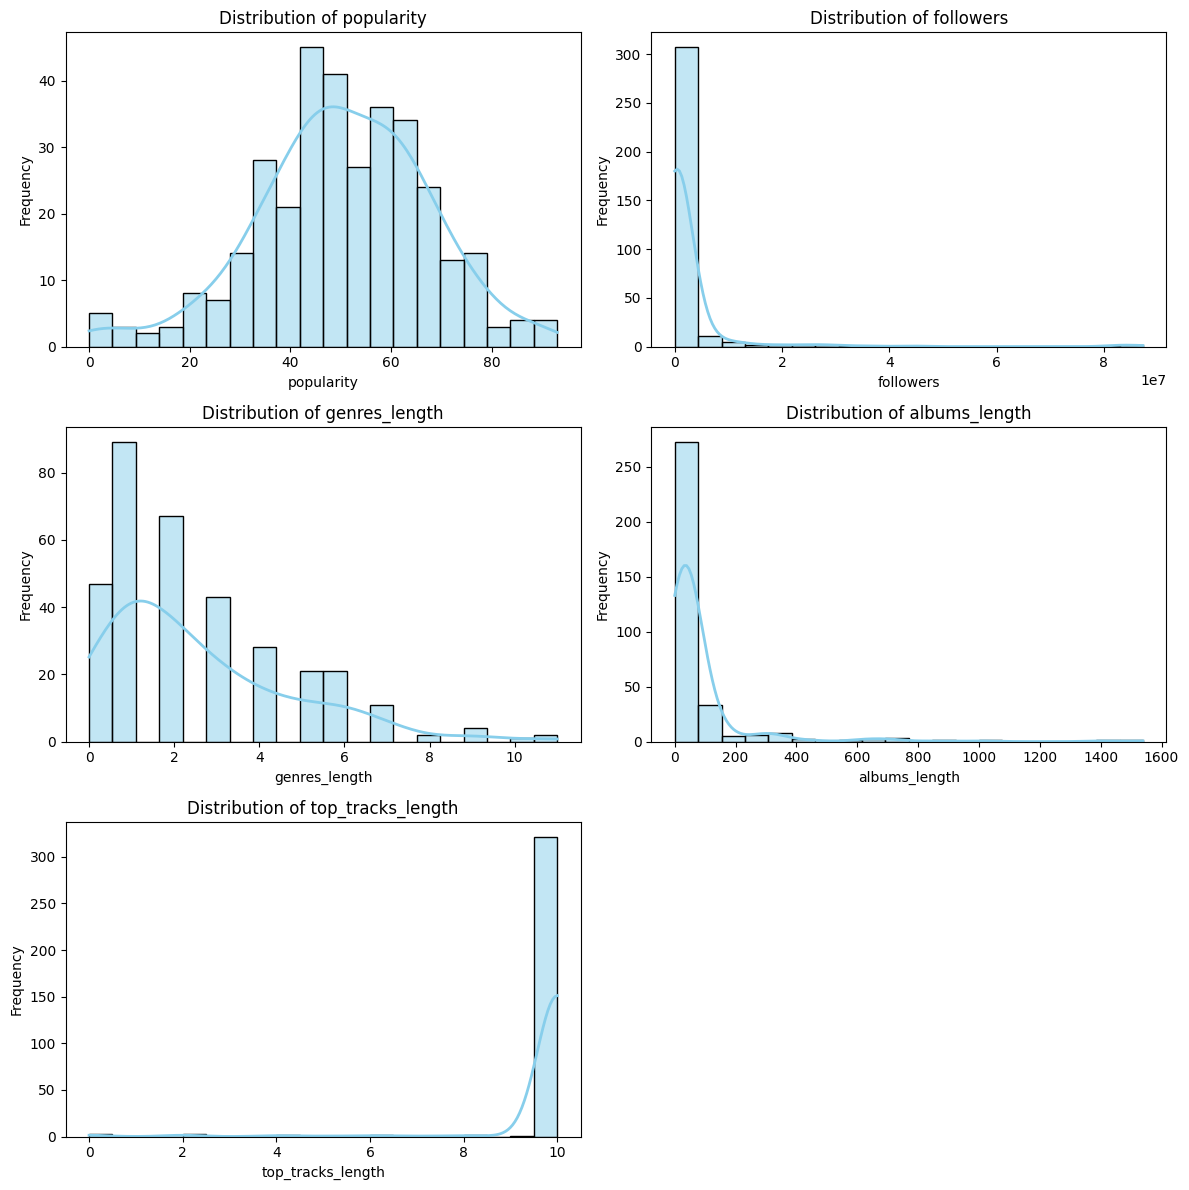

In [20]:
plot_numeric_distributions(df_copy)

In [21]:
df_copy[df_copy['top_tracks_length'] != 10]

,id,uri,name,genres,popularity,followers,albums,top_tracks,genres_length,albums_length,top_tracks_length
30,6Y43bUHBIIXbMw8TMkTIAf,spotify:artist:6Y43bUHBIIXbMw8TMkTIAf,Eugene Naumov,[],3,82,"[4YEyC7kUIfHSwtR3WJJW8h, 3YTqLnABdkiAU8DmLLvQll]","[6F8htsok8BD2DigTgifNt2, 46DrMmT3qc45ZDIjOpxKQK]",0,2,2
70,7FdiFZd8HjolnaNEUjkW64,spotify:artist:7FdiFZd8HjolnaNEUjkW64,Lukas Koch,[],17,646,"[2HygaWdSRaAwn5el7wozWe, 44bpBB3HQaGW4eHBkjcTl...","[0YzJfrnyd8xTSges7WVp5z, 4ZgtwZ7qBfXIsROqDTIMv...",0,6,9
97,27sdgIaFiz55vkR68fBiy8,spotify:artist:27sdgIaFiz55vkR68fBiy8,Alek Olsen,[corecore],62,72214,"[2YXww1viuuKZPi458rdopk, 28H6A2ylXGBsg2gDbLvQV...","[1lb0KfG9EyfSBsEifTUtXY, 75GwJi8ruSsNTBLoGBMFB...",1,11,8
109,1Cd6Obv3iAFx1hIq5uO95k,spotify:artist:1Cd6Obv3iAFx1hIq5uO95k,Nikky Bourbon,[],15,125,"[3fpm7TNfRCQ0p8wOKo4TwJ, 3XiV0BY3b1u26WgxMEN86...",[],0,3,0
126,3zW0xazqnHoq9QV9zBROVC,spotify:artist:3zW0xazqnHoq9QV9zBROVC,it's murph,[stutter house],56,44731,"[3zbFfZPvh2CZIaf8E6NATL, 0vEbniv3VNZ8wMPSRHUcd...","[5XFktAerFHxM4tp7EhzTrh, 7u0fz3V6cYeYTX91DMmIv...",1,7,6
157,6jdLQbJfJuo1uZf5TiHcpL,spotify:artist:6jdLQbJfJuo1uZf5TiHcpL,elin kastlander,[],0,31,[],[],0,0,0
174,1kgoGhvV1nEGVHFhY4VbcH,spotify:artist:1kgoGhvV1nEGVHFhY4VbcH,Jacal,[],27,2011,"[6b3trQL9v5MIku360PpFE2, 2B2KVj4tEeH5mdNTWARI7...","[6eJ83DMOPESUp67NcWMY53, 6onXw32PGm9MaLG4mJCwd...",0,5,7
176,4DWl8U58uYeeTtlvbrLEY6,spotify:artist:4DWl8U58uYeeTtlvbrLEY6,Gordon Tracks,[],45,1107,"[2E1q8eohZZ1BUQ7Bq5WUIY, 5vPkXW6vf04tOaVP9DWEi...",[],0,3,0
244,0HA5xUfOC7tVwJVzwvFUg3,spotify:artist:0HA5xUfOC7tVwJVzwvFUg3,DrDisrespect,[],35,23608,"[2jkB6q15WDxfZzSBcZ1MhA, 33WZZjLUniQouzbIeEeIA...","[6c8p3UnDKe9hth4PoGuA3o, 4xek02iXNBSOMa4REfwc2...",0,10,6
253,10Mq65D17BrcHPS8po0hKZ,spotify:artist:10Mq65D17BrcHPS8po0hKZ,Pierre Harmegnies,[],35,367,"[7K5tfkdeToVwZaEnEv2atb, 3GN7FSrFZDEUo1j1GbFcC...","[46Yno23oC4DjdkmgacPOMR, 1prMopMAGX5cLYI8DeRPqT]",0,5,2


It might happen that an artist does not have 10 songs yet.

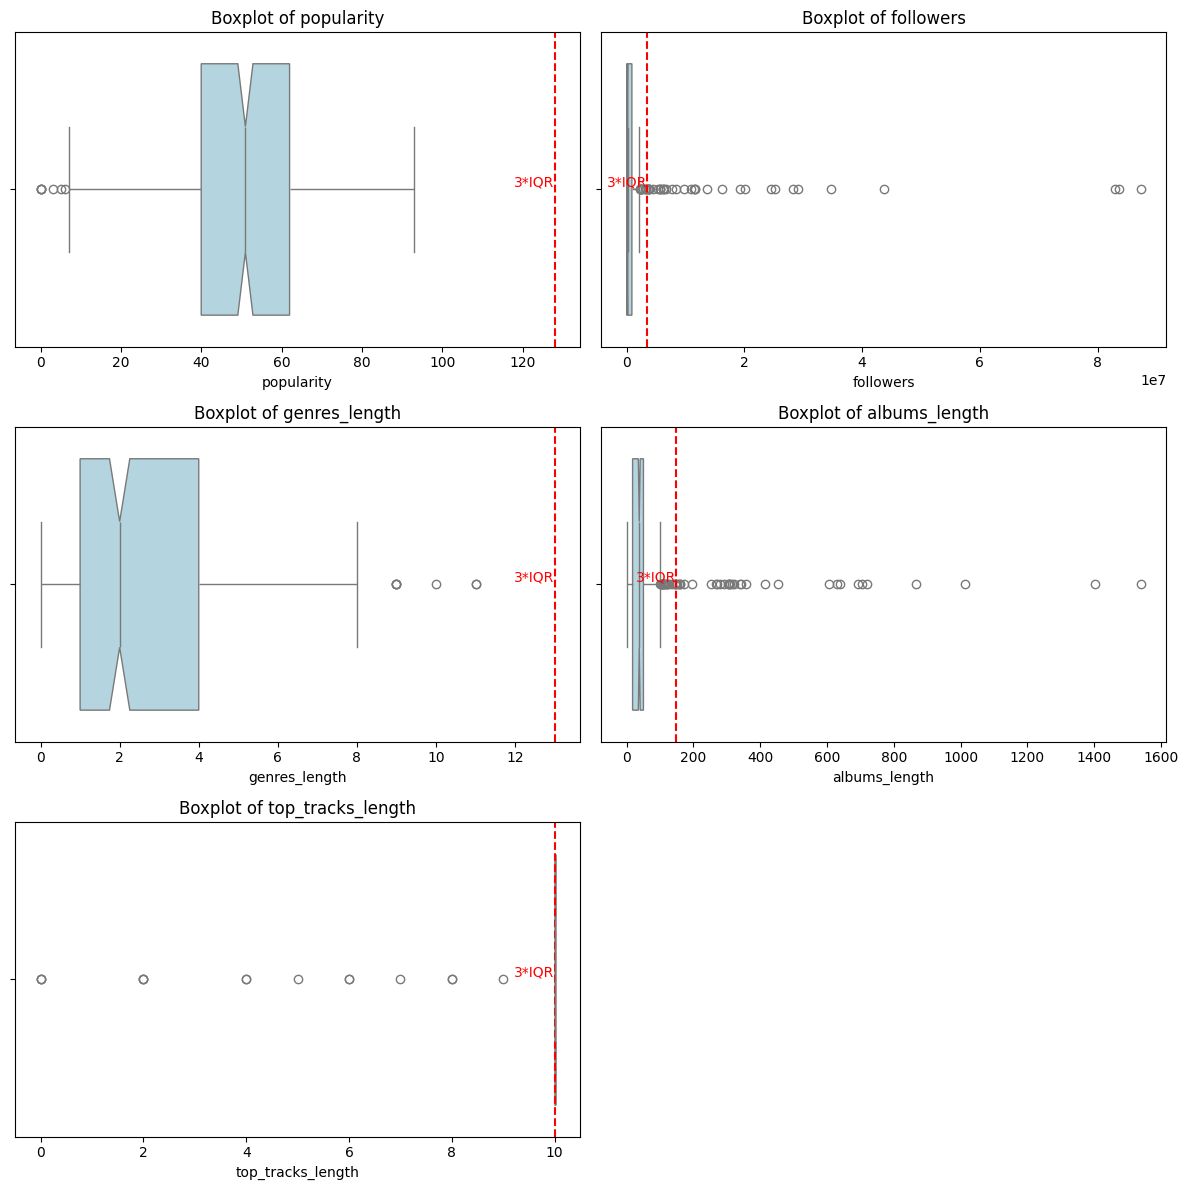

In [22]:
plot_boxplots_and_outliers(df_copy)

In [23]:
df_copy[df_copy['albums_length'] > 1000]

,id,uri,name,genres,popularity,followers,albums,top_tracks,genres_length,albums_length,top_tracks_length
72,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",91,82902188,"[35dut3ICqF3NEDkjxfzJJ1, 1OARrXe5sB0gyy3MhQ8h9...","[7CyPwkp0oE8Ro9Dd5CUDjW, 7MXVkk9YMctZqd1Srtv4M...",3,1539,10
110,10exVja0key0uqUkk6LJRT,spotify:artist:10exVja0key0uqUkk6LJRT,Vance Joy,"[folk-pop, modern rock]",72,3053523,"[6pcblUE1ovhBPBCB7IHv8X, 2290QOqExnVHp302b4zYa...","[7yq4Qj7cqayVTp3FF9CWbm, 29jtZGdgpE2lWm2mkIt6H...",2,1402,10
142,246dkjvS1zLTtiykXe5h60,spotify:artist:246dkjvS1zLTtiykXe5h60,Post Malone,"[dfw rap, melodic rap, pop, rap]",87,43729075,"[1F9LY06gadScF4g3g3BrDC, 6r1lh7fHMB499vGKtIyJL...","[2OzhQlSqBEmt7hmkYxfT6m, 0RiRZpuVRbi7oqRdSMwhQ...",4,1012,10


Loads of albums by some artists, but most have only a few.

In [24]:
df_copy[df_copy['genres_length'] > 8]

,id,uri,name,genres,popularity,followers,albums,top_tracks,genres_length,albums_length,top_tracks_length
56,2o7L9DNcmzocYll1o0GGTU,spotify:artist:2o7L9DNcmzocYll1o0GGTU,Leon Vynehall,"[ambient house, deep house, electronica, float...",40,97318,"[5UfCxNbc7RTtM6FyVqyi5x, 079AdoqJO9xYz56hQPb6p...","[5AdcWcvRVnQvFtJ90A2XUK, 1OD2YXIOmfYmBAYfV1maR...",9,44,10
116,31uyAcnY0kjjKKIQZMKX4i,spotify:artist:31uyAcnY0kjjKKIQZMKX4i,Grouper,"[ambient, ambient pop, art pop, dream pop, dro...",57,267193,"[1w3EOCPDwqWIiu2c1pHylJ, 5wy223m8JP5DBOvgumFgN...","[6Q5uDNuuFYa8ToL3CCoHPC, 35VfLKymw2iZKWnLTvm8X...",10,25,10
131,4OrizGCKhOrW6iDDJHN9xd,spotify:artist:4OrizGCKhOrW6iDDJHN9xd,DIIV,"[brooklyn indie, dream pop, dreamo, indie rock...",48,365227,"[6GUbAGnzdeiPqKivIk6FKu, 5FFuado5azIt5lxMLQjCP...","[30uvCVEYqgktyLfDcI76Hx, 5zoVhJ5O5PFmPsnHIIkq5...",9,18,10
184,432R46LaYsJZV2Gmc4jUV5,spotify:artist:432R46LaYsJZV2Gmc4jUV5,Joy Division,"[alternative rock, art rock, indie rock, madch...",59,2402324,"[0KBdfMTMxi0oD1oVqApTjr, 1HnxC8MLDciii5LebJ09K...","[34iOH7LY3vme5rQxsVILZ4, 5fbQCQt91LsVgXusFS0CC...",9,268,10
191,3kjuyTCjPG1WMFCiyc5IuB,spotify:artist:3kjuyTCjPG1WMFCiyc5IuB,Arcade Fire,"[alternative rock, baroque pop, canadian indie...",61,2270747,"[2sAePf08xIp4tnDlMUCV8B, 7xBJ2XXlDFfACXAnOE86t...","[5iItYl3Q6wCnKVfpK1uNVf, 6Hmj7SrLRbreLVfVS7mV1...",11,30,10
240,066X20Nz7iquqkkCW6Jxy6,spotify:artist:066X20Nz7iquqkkCW6Jxy6,LCD Soundsystem,"[alternative dance, alternative rock, art pop,...",56,1092874,"[6iVbNJBKV53qgNPKPpcBLt, 0hdimlCTCms7otJCX9Ovq...","[5MP8QCjsJQPJ5ApdHMg3dl, 2cmRpmO04TLaKPzmAzySY...",11,308,10
306,4FZ3j1oH43e7cukCALsCwf,spotify:artist:4FZ3j1oH43e7cukCALsCwf,Jack White,"[alternative rock, blues rock, garage rock, ga...",52,1321437,"[6CcC2RiYVSTsxI73d4lEeB, 4GxhBXlAhfNzI7ehTDmFJ...","[3ODl8J0TZAykdMCtCIO28n, 3T76zPJz3tWL27FrjJe2o...",9,62,10


In [25]:
# get all unique genres
genres = set()
for genre in df['genres']:
    genres.update(genre)
f"There are {len(genres)} different genres in the artist dataset."

'There are 381 different genres in the artist dataset.'

In [26]:
f"There are {len(df[df['genres'].apply(lambda x: len(x) == 0)])} artists with no genres."

'There are 47 artists with no genres.'

In [27]:
# is there empty string in genres
len(df[df['genres'].apply(lambda x: '' in x)])

0

In [28]:
f"There are {len(df[df['albums'].apply(lambda x: len(x) == 0)])} artists with no albums."

'There are 2 artists with no albums.'

In [29]:
df[df['albums'].apply(lambda x: len(x) == 0)]

,id,uri,name,genres,popularity,followers,albums,top_tracks
134,0LyfQWJT6nXafLPZqxe9Of,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,[],0,2411603,[],"[4Y2iP7H0ouyXORPBUGRQKx, 0E5yP9VjrfG7wRyjWN9tr..."
157,6jdLQbJfJuo1uZf5TiHcpL,spotify:artist:6jdLQbJfJuo1uZf5TiHcpL,elin kastlander,[],0,31,[],[]


In [31]:
# save df to data/formatted_artists.json
df.to_json('../data/formatted_artists.json', orient='records', lines=True)